In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('F:\\Data set\\tele.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Changing object datatype to float
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#Checking missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#filling missing values using median
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

In [11]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


26.5% of customers churned ,indicating an imbalanced data

In [13]:
# freequency counts for categorical columns
for i in ['Contract','gender','PaymentMethod','InternetService']:
    print(f"\nValue Counts for {i}:")
    print(data[i].value_counts(normalize=True))


Value Counts for Contract:
Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

Value Counts for gender:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Value Counts for PaymentMethod:
PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

Value Counts for InternetService:
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


Insights:
Nearly equal distribution of gender,
Electronic Check is most commonly used payment method

DATA VISUALIZATION

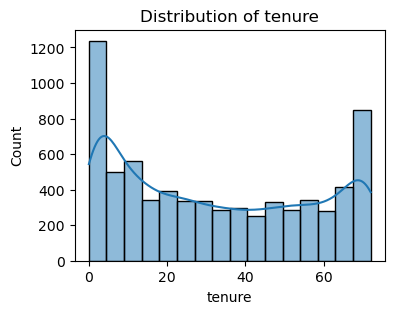

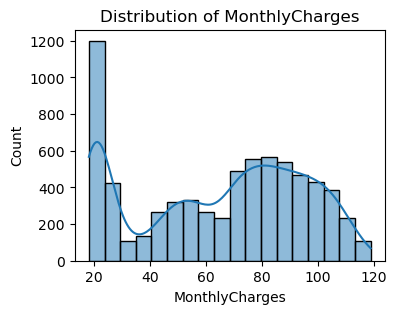

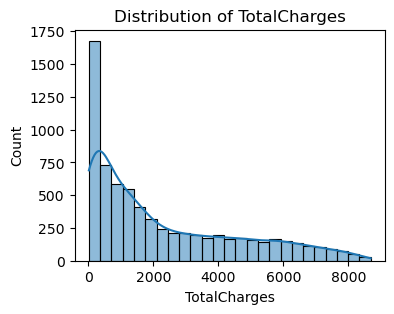

In [17]:
# histogramme for numerical column

for i in ['tenure','MonthlyCharges','TotalCharges']:
    plt.figure(figsize=(4,3))
    sns.histplot(data[i],kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

Insights:A large number of customers have very short tenure (0–5 months), suggesting many customers either leave soon after joining or are recently acquired.There is a noticeable second peak near the maximum tenure (around 70+ months), indicating a group of long-term, loyal customers who have stayed for many years.These two peaks create a bimodal pattern, reflecting two dominant customer behaviors.

A large no of customers pay aroung 20 per month indicating many are subscribed to basic or minimal service plans
There is a broad spread of customers paying between 40 and 100 showing that the company offers diverse service packages attracting different customer segments.

Most customers have low total charges, indicating short service duration or low usage.
A smaller but valuable group of long-term customers contribute significantly to total revenue.

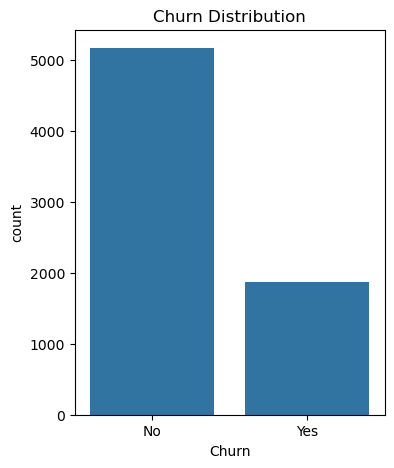

In [15]:
#Bar Plot for Churn
plt.figure(figsize=(4,5))
sns.countplot(x='Churn',data=data)
plt.title("Churn Distribution")
plt.show()

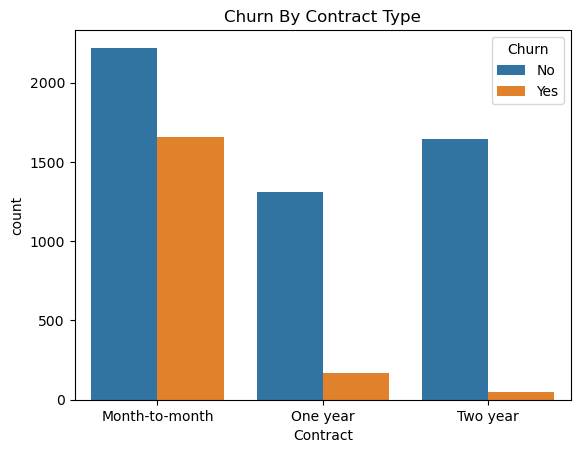

In [19]:
#Churn By Contract type
sns.countplot(x='Contract',hue='Churn',data=data)
plt.title('Churn By Contract Type')
plt.show()

Month to Month Contract shows high Churn rate 

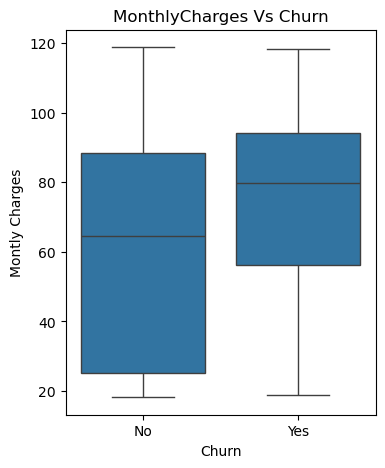

In [16]:
# Box plot Monthly Charges Vs Churn
plt.figure(figsize=(4,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=data)
plt.title('MonthlyCharges Vs Churn')
plt.xlabel('Churn')
plt.ylabel('Montly Charges')
plt.show()

Churned customers have higher MonthlyCharges than non churned customers.Shows expensive plans could drive churn

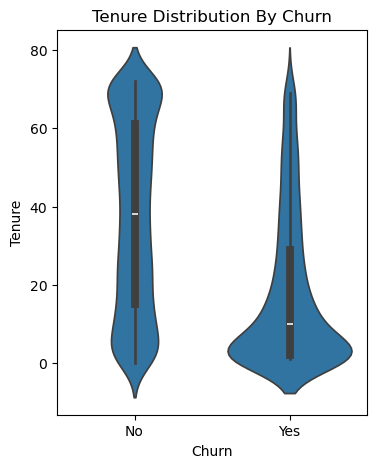

In [17]:
#violin plot Tenure vs Churn

plt.figure(figsize=(4,5))
plt.title("Tenure Distribution By Churn")
sns.violinplot(x='Churn',y='tenure',data=data)     
plt.xlabel("Churn")
plt.ylabel("Tenure") 
plt.show()

Non Churned customer likely have wider and higher tenure distribution
churned customers cluster at lower tenure values

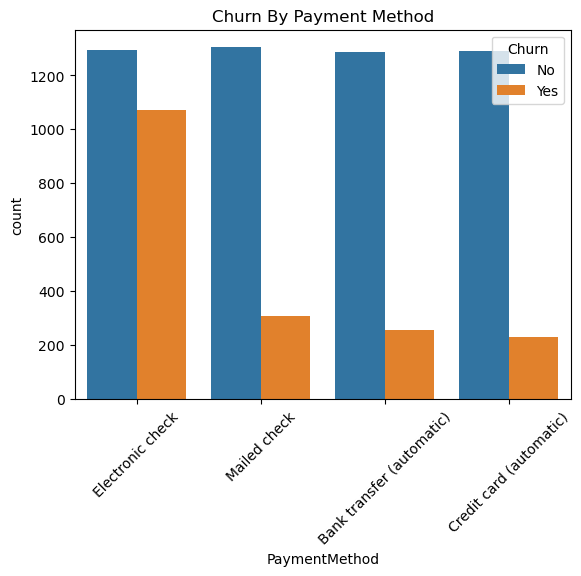

In [23]:
sns.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.xticks(rotation=45)
plt.title('Churn By Payment Method')
plt.show()

Insight:Customers using electronic checks shows high churn rate 
        Credit card and bank transfer shows low churn rate

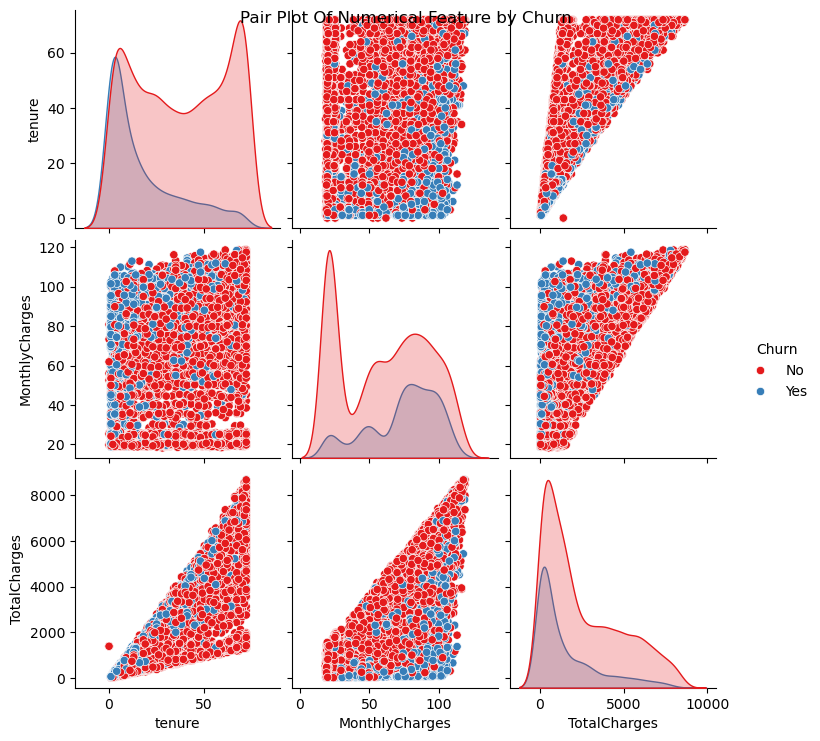

In [26]:
#Pair plot
sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges','Churn']],hue='Churn',palette='Set1',diag_kind='kde')
plt.suptitle('Pair Plot Of Numerical Feature by Churn')
plt.show()


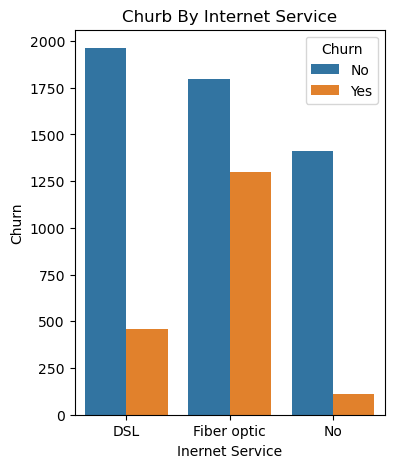

In [19]:
#Count plot Churn Vs Internet Service
plt.figure(figsize=(4,5))
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.title('Churb By Internet Service')
plt.xlabel('Inernet Service')
plt.ylabel('Churn')
plt.show()

Customer with Fiber Optic may have higher Churn than DSL or No Internet 
No Internet customers likely have lower churn

In [27]:
#Customer Id is not relevant so we can drop it
data=data.drop('customerID',axis=1)

In [28]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
#Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Cat_col=data.select_dtypes(include=['object']).columns
for i in Cat_col:
    data[i]=lb.fit_transform(data[i])


In [30]:
#Splitting the data for Modeling
from sklearn.model_selection import train_test_split
X=data.drop('Churn',axis=1)
y=data['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

MODELING

In [31]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print("Classification Report")
print(classification_report(y_test,y_pred_lr))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lr))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix
[[922 114]
 [156 217]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [34]:
print("Classification Report")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix
[[946  90]
 [202 171]]


In [35]:
#Handling Imbalanced data

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [36]:
lr_sm=LogisticRegression()
lr_sm.fit(X_train,y_train)
y_pred_lrsm=lr.predict(X_test)

In [37]:
print("Classification Report")
print(classification_report(y_test,y_pred_lrsm))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lrsm))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix
[[922 114]
 [156 217]]


In [40]:
#Retrain the model

model_sm=RandomForestClassifier(random_state=42)
model_sm.fit(X_train_sm,y_train_sm)
y_pred_sm=model_sm.predict(X_test)

In [41]:
print("Classification Report")
print(classification_report(y_test,y_pred_sm))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_sm))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix
[[877 159]
 [157 216]]


In [43]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

TotalCharges        19.270218
MonthlyCharges      17.921196
tenure              15.587581
Contract             8.023799
PaymentMethod        4.910861
OnlineSecurity       4.847175
TechSupport          4.050908
gender               2.919346
InternetService      2.543086
Partner              2.473619
PaperlessBilling     2.473556
OnlineBackup         2.443386
MultipleLines        2.272155
DeviceProtection     2.124434
SeniorCitizen        2.061555
Dependents           2.003549
StreamingMovies      1.793688
StreamingTV          1.716126
PhoneService         0.563762
dtype: float64

Conclusion:
In this project I analyzed a telecome customer churn dataset to identify the key factors influencing customer attrition and to build predictive models that can help the business proactively reduce churn
after performing Data Preprocessing,Exploratory Data Analysis and feature engineering I observed that the dataset was imbalanced ,To address that we used SMOTE
Two ML Models -Logistic Regresson and Random forest were trained and evaluated.

Key Insights:
Customers with month-to-month contracts, high monthly charges, and low tenure were far more likely to churn.
TotalCharges, MonthlyCharges, Tenure, and Contract Type were the most important features in predicting churn.
Long-term contract customers (1-year or 2-year) showed significantly lower churn rates.
Features like OnlineSecurity, TechSupport, and StreamingServices also had notable influence on churn behavior.

Model Performance:
Logistic regression is selected as the final model for churn prediction .it out performed Random Forest in overall accuracy,precisionand F1-Score 

Business Recommendations:
1. Target high-risk customers (short tenure, high monthly charges, month-to-month contracts) with loyalty programs, discounts, or contract upgrade offers.
2. Improve customer experience and support services — especially in areas like online security, tech support, and backup services — which are linked to higher retention.
3. Use the churn prediction model to create proactive retention campaigns, focusing on customers flagged as high-risk.